In [1]:
#This is the implementation of the prophet model on our dataset
import pandas as pd
from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load data
df = pd.read_csv("archive/Stocks/aapl.us.txt")

# Rename columns to Prophet's expected names
df = df.rename(columns={"Date": "ds", "Close": "y"})

import datetime

# convert dates from string to numerical lowers MAE and MSE
df['ds'] = pd.to_datetime(df['ds'])

import matplotlib.pyplot as plt
low = {'mae': 0, 'i': 0}
for i in range(100, len(df), 500):
    print(i)
    # split the data into training and testing sets
    train = df.iloc[:i]
    test = df.iloc[i:]
    test = test.reset_index(drop=True)

    # Initialize Prophet model
    model = Prophet()

    model.add_seasonality(name='weekly', period=7, fourier_order=15)

    # Fit model to training data
    model.fit(train)

    # make predictions on the test data
    predictions = model.predict(test)
    mae = mean_absolute_error(test['y'], predictions['yhat'])
    if i == 100:
        low['mae'] = mae
        low['i'] = i
    
    if mae < low['mae']:
        low['mae'] = mae
        low['i'] = i

print(low)

100


20:15:58 - cmdstanpy - INFO - Chain [1] start processing
20:15:58 - cmdstanpy - INFO - Chain [1] done processing
20:16:01 - cmdstanpy - INFO - Chain [1] start processing


600


20:16:01 - cmdstanpy - INFO - Chain [1] done processing


1100


20:16:04 - cmdstanpy - INFO - Chain [1] start processing
20:16:04 - cmdstanpy - INFO - Chain [1] done processing


1600


20:16:07 - cmdstanpy - INFO - Chain [1] start processing
20:16:07 - cmdstanpy - INFO - Chain [1] done processing


2100


20:16:10 - cmdstanpy - INFO - Chain [1] start processing
20:16:11 - cmdstanpy - INFO - Chain [1] done processing


2600


20:16:13 - cmdstanpy - INFO - Chain [1] start processing
20:16:14 - cmdstanpy - INFO - Chain [1] done processing


3100


20:16:16 - cmdstanpy - INFO - Chain [1] start processing
20:16:18 - cmdstanpy - INFO - Chain [1] done processing


3600


20:16:20 - cmdstanpy - INFO - Chain [1] start processing
20:16:22 - cmdstanpy - INFO - Chain [1] done processing


4100


20:16:24 - cmdstanpy - INFO - Chain [1] start processing
20:16:25 - cmdstanpy - INFO - Chain [1] done processing


4600


20:16:27 - cmdstanpy - INFO - Chain [1] start processing
20:16:29 - cmdstanpy - INFO - Chain [1] done processing


5100


20:16:31 - cmdstanpy - INFO - Chain [1] start processing
20:16:37 - cmdstanpy - INFO - Chain [1] done processing


5600


20:16:39 - cmdstanpy - INFO - Chain [1] start processing
20:16:42 - cmdstanpy - INFO - Chain [1] done processing


6100


20:16:44 - cmdstanpy - INFO - Chain [1] start processing
20:16:47 - cmdstanpy - INFO - Chain [1] done processing


6600


20:16:49 - cmdstanpy - INFO - Chain [1] start processing
20:16:52 - cmdstanpy - INFO - Chain [1] done processing


7100


20:16:54 - cmdstanpy - INFO - Chain [1] start processing
20:17:00 - cmdstanpy - INFO - Chain [1] done processing


7600


20:17:01 - cmdstanpy - INFO - Chain [1] start processing
20:17:10 - cmdstanpy - INFO - Chain [1] done processing


8100


20:17:11 - cmdstanpy - INFO - Chain [1] start processing
20:17:21 - cmdstanpy - INFO - Chain [1] done processing


{'mae': 14.961592052543047, 'i': 7100}


20:17:51 - cmdstanpy - INFO - Chain [1] start processing
20:18:03 - cmdstanpy - INFO - Chain [1] done processing


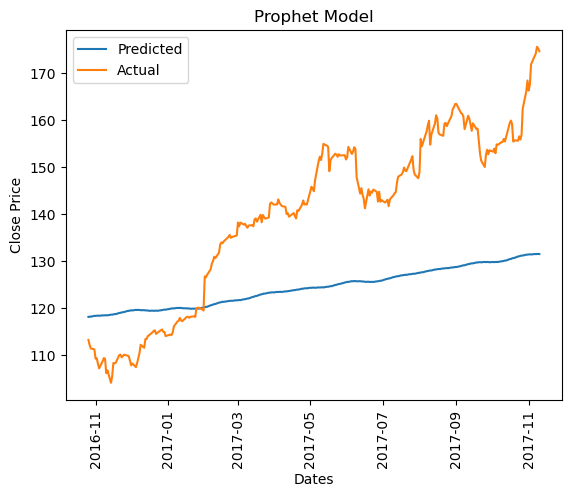

MSE: 448.9006858535038
MAE: 18.80226812639066
RMSE: 21.187276508638476


In [3]:
# split the data into training and testing sets
""" train = df.iloc[:7100]
test = df.iloc[7100:] """

test = test.reset_index(drop=True)

# Initialize Prophet model
model = Prophet()

model.add_seasonality(name='weekly', period=7, fourier_order=15)

# Fit model to training data
model.fit(train)

# make predictions on the test data
predictions = model.predict(test)

# Plot the predicted and actual values
plt.plot(predictions['ds'], predictions['yhat'], label='Predicted')
plt.plot(predictions['ds'], test['y'], label='Actual')
plt.title("Prophet Model")
plt.xlabel("Dates")
plt.ylabel("Close Price")
plt.setp(plt.gca().xaxis.get_majorticklabels(),
         'rotation', 90)
plt.legend()
plt.show()

from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# evaluate performance
mse = mean_squared_error(test['y'], predictions['yhat'])
print("MSE:", mse)
mae = mean_absolute_error(test['y'], predictions['yhat'])
print("MAE:", mae)
rmse = np.sqrt(mse)
print("RMSE:", rmse)